In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create input tensor X
X = torch.linspace(-1, 1, 100).reshape(-1, 1)

# Calculate y using PyTorch functions
y = torch.sin(5 * torch.pi * X) / (5 * torch.pi * X)


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, input_size=1, hidden1=5, hidden2=10, hidden3=10, hidden4=10, hidden5=10, hidden6=10, hidden7=5, output_size=1):
        super(Model, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, hidden3),
            nn.ReLU(),
            nn.Linear(hidden3, hidden4),
            nn.ReLU(),
            nn.Linear(hidden4, hidden5),
            nn.ReLU(),
            nn.Linear(hidden5, hidden6),
            nn.ReLU(),
            nn.Linear(hidden6, hidden7),
            nn.ReLU(),
            nn.Linear(hidden7, output_size)
        )
        
    def forward(self, x):
        return self.layers(x)


In [4]:
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [5]:
epochs = 300
losses = []
grad_norm_list = []

for epoch in range(1, epochs + 1):
    # Forward pass
    y_pred = model(X)
    
    # Calculate loss
    loss = criterion(y_pred, y)
    losses.append(loss.item())  # Store loss value
    
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Backpropagation
    loss.backward()
    
    # Optimizer step
    optimizer.step()
    
    # Calculate gradient norm
    total_grad = 0.0
    for param in model.parameters():
        if param.grad is not None:
            total_grad += (param.grad.cpu().data.numpy() ** 2).sum()
    
    grad_norm = total_grad ** 0.5
    grad_norm_list.append(grad_norm)


In [6]:
losses = torch.tensor(losses, dtype=torch.float32)


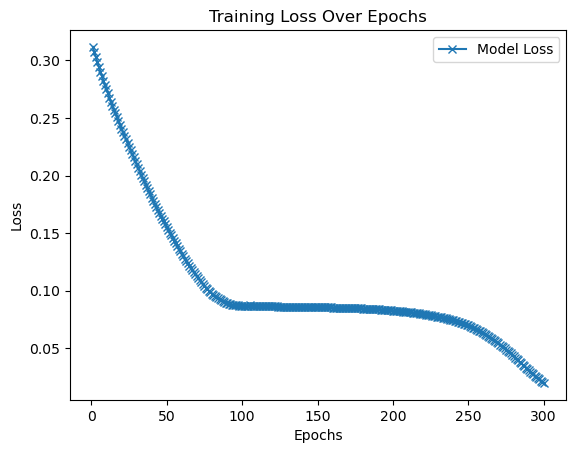

In [7]:
# Ensure losses is a CPU tensor and convert it to a list for plotting
loss_values = [loss.item() for loss in losses]

# Plot the loss over epochs
plt.plot(range(1, epochs + 1), loss_values, linestyle='-', marker='x', label='Model Loss')

# Add title and labels
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Add legend
plt.legend(loc="upper right")

# Show the plot
plt.show()


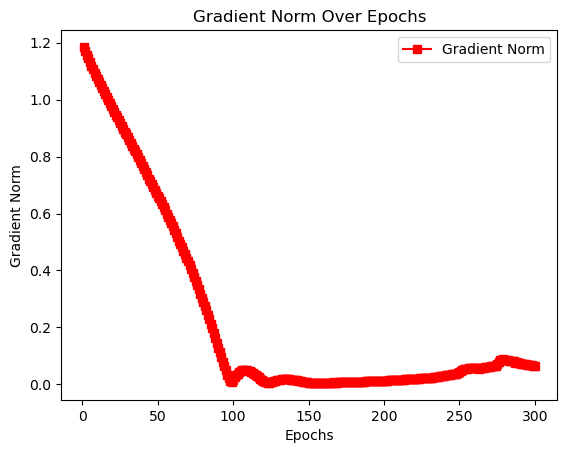

In [8]:


# Plot gradient norm over epochs
plt.plot(range(1, epochs + 1), grad_norm_list, color='red', linestyle='-', marker='s', label='Gradient Norm')

# Add title and axis labels
plt.title("Gradient Norm Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")

# Display legend
plt.legend(loc="upper right")

# Show the plot
plt.show()
